In [5]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in the data

df = pd.read_csv(r'C:\Users\tssco\Downloads\movies.csv')

In [33]:
# Let's Look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
1,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
2,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
3,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000.0,39754601.0,1812,95.0
4,5573,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000.0,115229890.0,2281,133.0


In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [12]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [6]:
pd.set_option('display.max_rows', None)

In [35]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
1,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
2,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
3,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000.0,39754601.0,1812,95.0
4,5573,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000.0,115229890.0,2281,133.0


In [ ]:
# Budget high correlation
# company high correlation

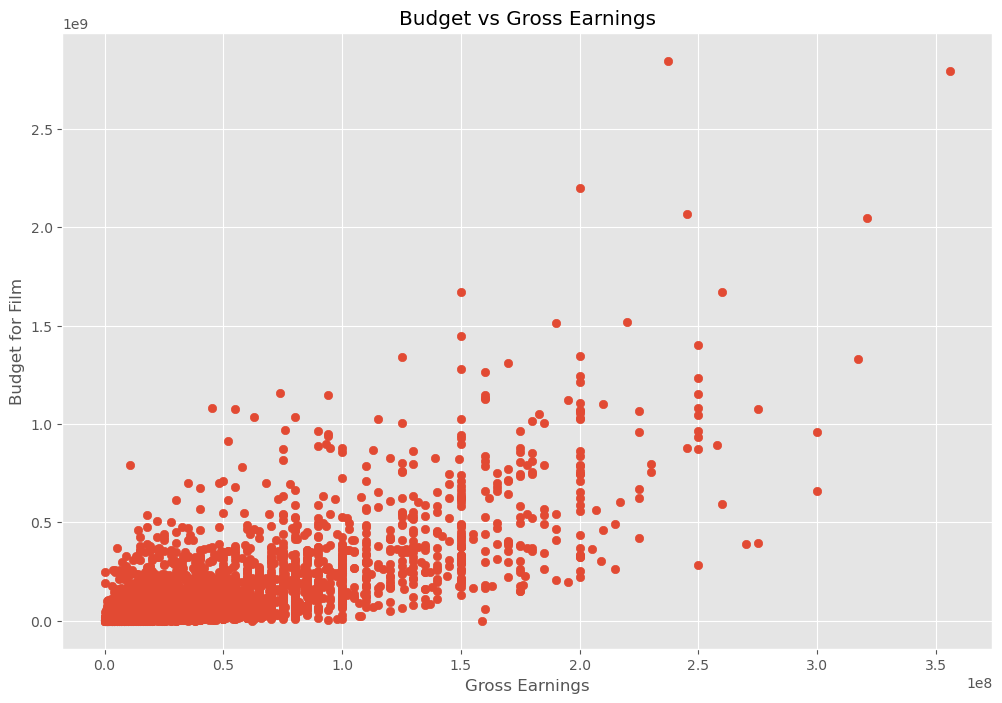

In [15]:
# Scatter plot with budget vs gross


plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [13]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5444,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7444,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3044,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6662,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7243,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


<Axes: xlabel='budget', ylabel='gross'>

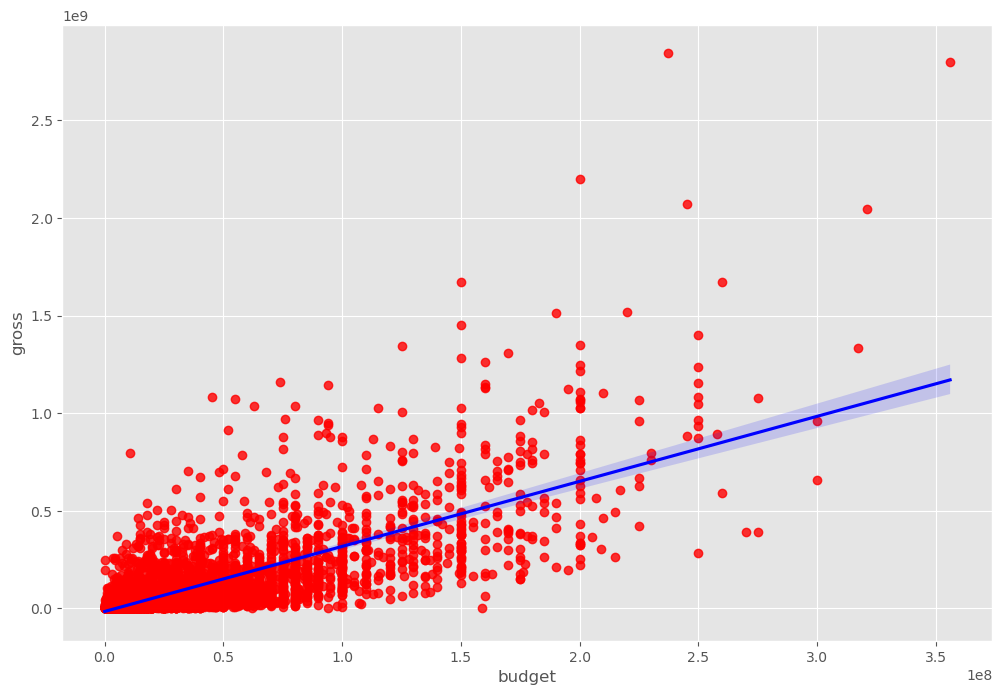

In [19]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})


In [10]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.168191,0.036161,0.965734,0.958984,-0.045005,0.289544,0.745692,0.805377,0.731512,0.145796,0.275374,0.947302,0.592578,0.054014
rating,0.168191,1.000000,-0.142413,0.181444,0.170128,0.010697,0.107663,0.103586,0.123485,0.108214,-0.005116,0.172610,0.182657,0.006336,0.037179
genre,0.036161,-0.142413,1.000000,0.032097,0.037243,-0.054653,-0.024132,0.043528,0.047359,0.059826,0.093758,-0.022815,0.027305,0.086093,0.064472
year,0.965734,0.181444,0.032097,1.000000,0.993186,-0.042160,0.314132,0.770307,0.825021,0.756362,0.143297,0.299197,0.980879,0.602516,0.057726
released,0.958984,0.170128,0.037243,0.993186,1.000000,-0.044787,0.301595,0.770600,0.819853,0.754430,0.152339,0.284280,0.976422,0.608876,0.055205
score,-0.045005,0.010697,-0.054653,-0.042160,-0.044787,1.000000,-0.018952,-0.019927,-0.028563,-0.008105,0.013056,-0.013155,-0.044894,-0.023900,0.024129
votes,0.289544,0.107663,-0.024132,0.314132,0.301595,-0.018952,1.000000,0.193251,0.225229,0.180673,-0.052329,0.400490,0.287869,0.010116,0.112337
director,0.745692,0.103586,0.043528,0.770307,0.770600,-0.019927,0.193251,1.000000,0.748634,0.682187,0.159306,0.105167,0.750718,0.552592,-0.007944
writer,0.805377,0.123485,0.047359,0.825021,0.819853,-0.028563,0.225229,0.748634,1.000000,0.676005,0.158631,0.185842,0.805807,0.546927,0.035450
star,0.731512,0.108214,0.059826,0.756362,0.754430,-0.008105,0.180673,0.682187,0.676005,1.000000,0.190123,0.106768,0.735645,0.527674,0.040560


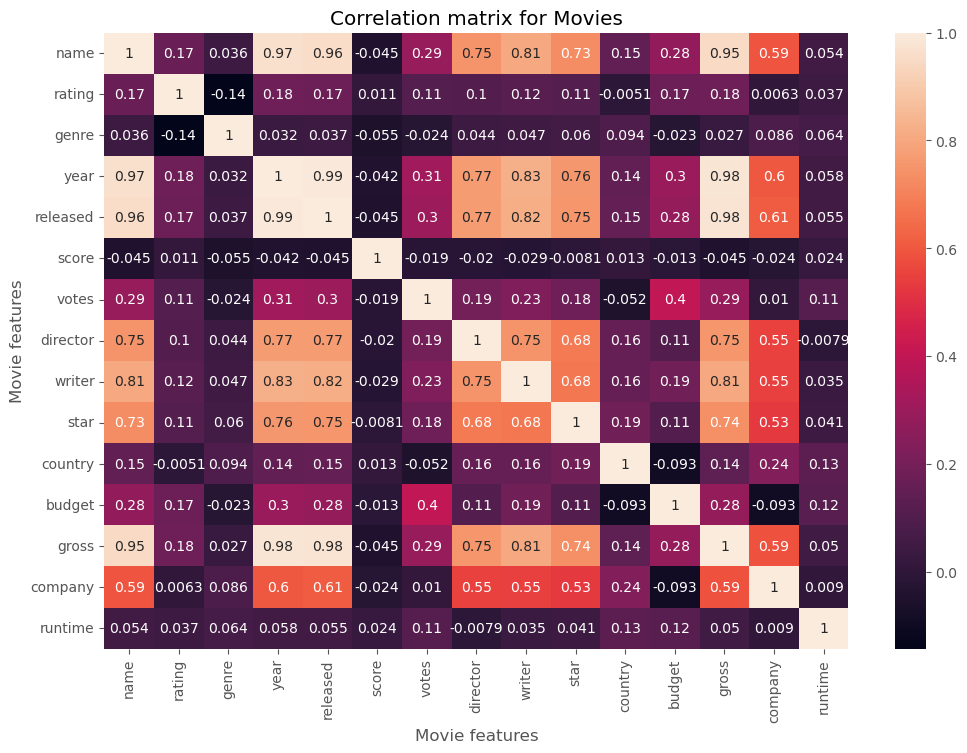

In [11]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [12]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.168191
         genre       0.036161
         year        0.965734
         released    0.958984
                       ...   
runtime  country     0.130088
         budget      0.119091
         gross       0.050003
         company     0.008997
         runtime     1.000000
Length: 225, dtype: float64


In [13]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre    rating    -0.142413
rating   genre     -0.142413
budget   company   -0.092936
company  budget    -0.092936
budget   country   -0.092633
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [14]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

company   star       0.527674
star      company    0.527674
company   writer     0.546927
writer    company    0.546927
director  company    0.552592
                       ...   
year      year       1.000000
genre     genre      1.000000
rating    rating     1.000000
company   company    1.000000
runtime   runtime    1.000000
Length: 71, dtype: float64


In [15]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56444423034
Universal Pictures           52514188890
Columbia Pictures            42950088240
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [16]:
df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926.0
"""Weathering With You"" Film Partners",2019,193457467.0
.406 Production,1996,10580.0
1+2 Seisaku Iinkai,2000,1196218.0
10 West Studios,2010,814906.0
...,...,...
i am OTHER,2015,17986781.0
i5 Films,2001,10031529.0
iDeal Partners Film Fund,2013,506303.0


In [17]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [18]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56444423034
Universal Pictures           52514188890
Columbia Pictures            42950088240
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

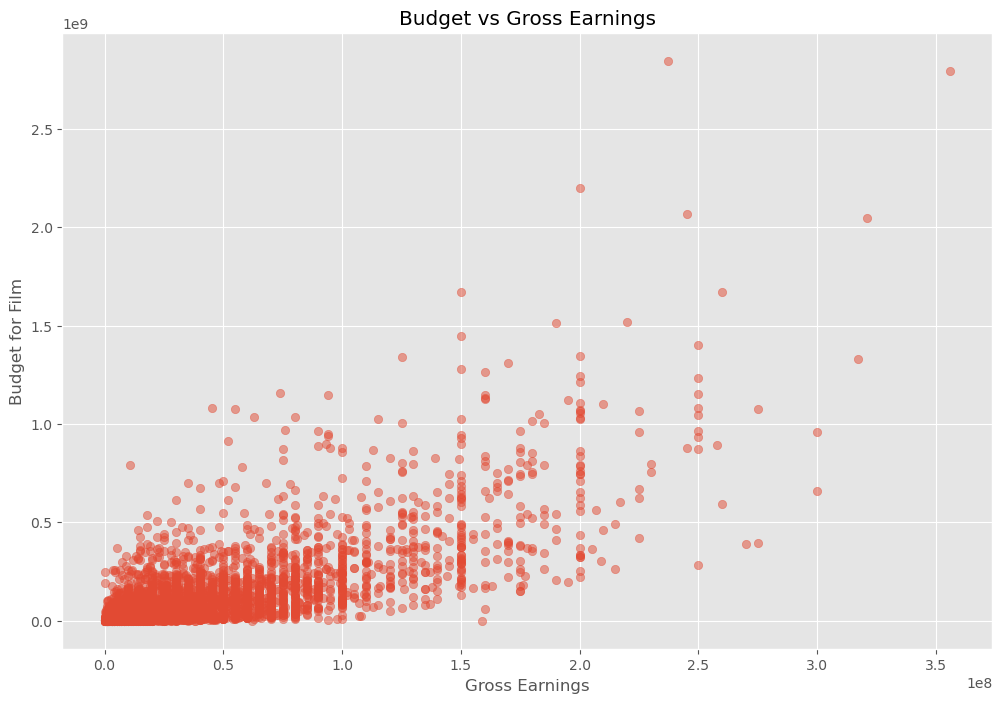

In [19]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [36]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
1,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
2,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
3,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000.0,39754601.0,1812,95.0
4,5573,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000.0,115229890.0,2281,133.0


In [22]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008259,0.016315,0.011966,-0.011286,0.016813,1.224771e-02,0.008768,8.919741e-03,0.006692,-0.010854,0.024187,0.005580,0.009100,0.010057
rating,-0.008259,1.000000,0.072444,0.009100,0.016632,-0.001441,3.285056e-02,0.019302,-5.992372e-03,0.013560,0.081180,-0.175878,-0.107318,-0.032976,0.062001
genre,0.016315,0.072444,1.000000,-0.081328,0.029799,0.027668,-1.461670e-01,-0.015292,6.358109e-03,-0.005594,-0.037607,-0.356688,-0.235670,-0.071349,-0.052987
year,0.011966,0.009100,-0.081328,1.000000,-0.000744,0.098418,2.246229e-01,-0.020297,-8.466509e-03,-0.027677,-0.070776,0.329165,0.257530,-0.010367,0.121354
released,-0.011286,0.016632,0.029799,-0.000744,1.000000,0.042783,1.611678e-02,-0.001455,-2.418820e-03,0.015743,-0.020416,0.014656,0.001655,-0.010503,0.000862
score,0.016813,-0.001441,0.027668,0.098418,0.042783,1.000000,4.086096e-01,0.009294,1.902752e-02,-0.001596,-0.133457,0.076361,0.186360,0.000610,0.399108
votes,0.012248,0.032851,-0.146167,0.224623,0.016117,0.408610,1.000000e+00,-0.000567,-1.586511e-07,-0.019048,0.073512,0.443541,0.631977,0.132587,0.308431
director,0.008768,0.019302,-0.015292,-0.020297,-0.001455,0.009294,-5.667557e-04,1.000000,2.989941e-01,0.039469,0.017381,-0.012068,-0.014397,0.004310,0.017310
writer,0.008920,-0.005992,0.006358,-0.008467,-0.002419,0.019028,-1.586511e-07,0.298994,1.000000e+00,0.027240,0.015310,-0.039435,-0.023496,0.005366,-0.003883
star,0.006692,0.013560,-0.005594,-0.027677,0.015743,-0.001596,-1.904775e-02,0.039469,2.723983e-02,1.000000,-0.012903,-0.019804,-0.002750,0.012351,0.010267


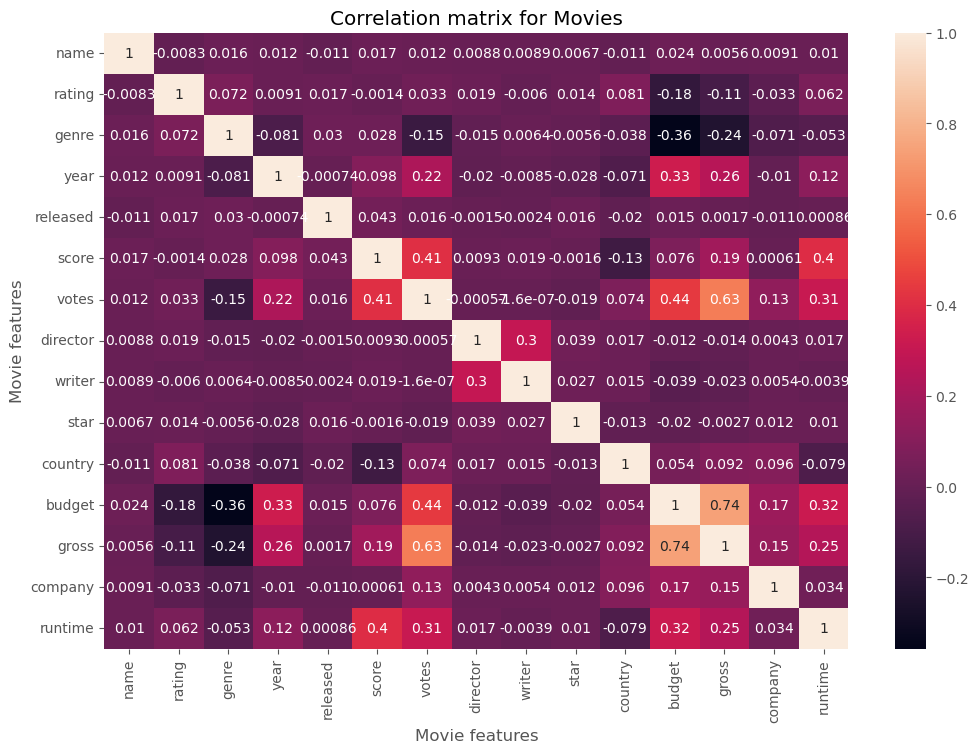

In [23]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()